In [87]:
#################
#   テキスト ⇒ 画像生成    #
#################

####テキスト→感情####

import time
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import itertools, pickle
from PIL import Image


MAX_SEQUENCE_LENGTH = 280 # max length of text (words) including padding

with open('models/txt2emo/tokenizer_cnn_ja.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
classes  =  ["happy", "sad", "disgust", "angry", "fear", "surprise"]
    
####テキスト→感情 モデル読み込み####
#model = load_model('models/txt2emo/checkpoint-0.923.h5')
model = load_model('models/txt2emo/model_2018-08-28-15:00.h5')

####感情→画像 モデル読み込み####
%run -i src/stg/main.py --mode test --dataset RaFD --rafd_crop_size 256 --image_size 64 --c_dim 3 --selected_attrs neg neu pos --rafd_image_dir inp/test --model_save_dir models/emo2Img --result_dir res


Namespace(attr_path='data/celeba/list_attr_celeba.txt', batch_size=16, beta1=0.5, beta2=0.999, c2_dim=8, c_dim=3, celeba_crop_size=178, celeba_image_dir='data/celeba/images', d_conv_dim=64, d_lr=0.0001, d_repeat_num=6, dataset='RaFD', g_conv_dim=64, g_lr=0.0001, g_repeat_num=6, image_size=64, lambda_cls=1, lambda_gp=10, lambda_rec=10, log_dir='stargan/logs', log_step=10, lr_update_step=1000, mode='test', model_save_dir='models/emo2Img', model_save_step=10000, n_critic=5, num_iters=200000, num_iters_decay=100000, num_workers=1, rafd_crop_size=256, rafd_image_dir='inp/test', result_dir='res', resume_iters=None, sample_dir='stargan/samples', sample_step=1000, selected_attrs=['neg', 'neu', 'pos'], test_iters=200000, use_tensorboard=True)
Generator(
  (main): Sequential(
    (0): Conv2d(6, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 12

<Figure size 576x396 with 0 Axes>

[[4.0837916e-04 1.4962701e-03 5.9904694e-03 8.6087990e-01 9.9876442e-04
  1.6824979e-03]]
[{'sentence': '誠に遺憾です', 'emotions': {'happy': '0.00040837916', 'sad': '0.0014962701', 'disgust': '0.0059904694', 'angry': '0.8608799', 'fear': '0.0009987644', 'surprise': '0.0016824979'}}]

％％％％％％結果％％％％％％
入力文： 誠に遺憾です -->感情推定結果： angry 

経過時間(text⇒emo)：0.009295463562011719
経過時間(emo⇒img)：0.03753948211669922
経過時間(total)：0.04683494567871094


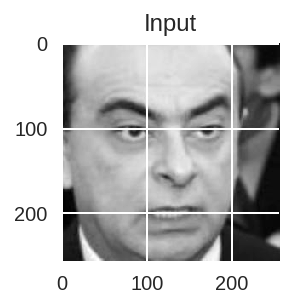

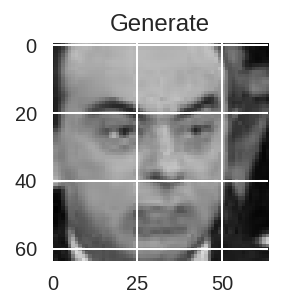

In [89]:
##入力##    
text = ["誠に遺憾です"]
img_path = "inp/test/neu/Carlos_Ghosn_0002.jpg"


t1 = time.time() 

targets = pad_sequences(tokenizer.texts_to_sequences(text), maxlen=MAX_SEQUENCE_LENGTH)
y_prob = model.predict(targets)
print(y_prob)
preds=[]
for i, ds in enumerate(model.predict(targets)):
            preds.append({
                "sentence":text[i],
                "emotions":dict(zip(classes, [str(d) for d in ds]))
            })
print(preds)
pred = y_prob.argmax(axis=-1)[0]
t2 = time.time() 

####結果表示####
print('')
print("％％％％％％結果％％％％％％")
print("入力文：", text[0],"-->感情推定結果：",classes[pred],"\n")

from PIL import Image
import matplotlib.pyplot as plt

# 元画像
img_inp = Image.open(img_path)
plt.figure(figsize=(3, 2)) # figureの縦横の大きさ
plt.title("Input")
plt.imshow(np.array(img_inp), 'gray')

# 出力画像
img_oup = Image.open("res/1-images.jpg")
imga = np.array(img_oup)
imsize = 64

plt.figure(figsize=(3, 2)) # figureの縦横の大きさ
plt.title("Generate")

# if pred == 0: # neutral
#     st = imsize*2
#     plt.imshow(imga[:, st:st+imsize])
if pred == 0: # happy
    st = imsize*3
    plt.imshow(imga[:, st:st+imsize])
else: # sad, disgust, angry, fear, surprise
    st = imsize
    plt.imshow(imga[:, st:st+imsize])
    
t3 = time.time() 
t_t2e = t2-t1
t_e2i = t3-t2
t_tot = t3-t1

print(f"経過時間(text⇒emo)：{t_t2e}")
print(f"経過時間(emo⇒img)：{t_e2i}")
print(f"経過時間(total)：{t_tot}")


In [3]:
#google colaboratory用
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/Colab Notebooks/facialexp_conv

/content/drive/My Drive/Colab Notebooks/facialexp_conv
